<a href="https://colab.research.google.com/github/abol-hasan/HousepricesPrediction_FeatureEngineering_DataAnalysis/blob/main/Hausprice_pandas_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
display(df)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
df.drop('Id',axis=1, inplace=True)

In [ ]:
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']
X.shape

(1460, 79)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
x_train.shape, x_test.shape

((1314, 79), (146, 79))

In [ ]:
y_train

930     201000
656     145500
45      319900
1348    215000
55      180500
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1314, dtype: int64

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
y_train

930     12.211060
656     11.887931
45      12.675764
1348    12.278393
55      12.103486
          ...    
763     12.727838
835     11.759786
1216    11.626254
559     12.363076
684     12.305918
Name: SalePrice, Length: 1314, dtype: float64

In [ ]:
# seperate data based on type. Here Object type
df_object = [col for col in df.select_dtypes(include=['object'])]
df_object.append('MSSubClass')
x_train[df_object] = x_train[df_object].astype('O')
x_test[df_object] = x_test[df_object].astype('O')

len(df_object)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


44

In [ ]:
# Find columns that have missing value in categorical columns
col_with_null = [col for col in df_object if x_train[col].isnull().sum() != 0]
print(len(col_with_null))
x_train[col_with_null].isnull().mean().sort_values(ascending=False)

16


PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageCond      0.056317
GarageQual      0.056317
GarageFinish    0.056317
GarageType      0.056317
BsmtFinType2    0.025114
BsmtExposure    0.025114
BsmtFinType1    0.024353
BsmtCond        0.024353
BsmtQual        0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

In [ ]:
# divide column in which the missing values have more than 0.1 percent and filling them with missing string
col_high_miss_value = [col for col in col_with_null if x_train[col].isnull().mean()>0.1]
col_small_miss_value = [col for col in col_with_null if x_train[col].isnull().mean()<0.1]
print(f'col_high_miss_value:{col_high_miss_value}')
print()
print(f'col_small_miss_value:{col_small_miss_value}')

col_high_miss_value:['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

col_small_miss_value:['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [ ]:
x_train[col_high_miss_value] = x_train[col_high_miss_value].fillna('Missing')
x_test[col_high_miss_value] = x_test[col_high_miss_value].fillna('Missing')
x_train['Alley'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0

In [ ]:
x_train['FireplaceQu'].isnull().sum()

0

In [ ]:
# check whether columns are filled or not
[col for col in col_high_miss_value if x_train[col].isnull().sum()>0]

[]

In [ ]:
# filling the missing data with the most frequent observation
for col in col_small_miss_value:
  
  mode = x_train[col].mode()[0]
  print(f'{col}: {mode}')
  x_train[col] = x_train[col].fillna(mode)
  x_test[col] = x_test[col].fillna(mode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


MasVnrType: None
BsmtQual: TA
BsmtCond: TA
BsmtExposure: No
BsmtFinType1: Unf
BsmtFinType2: Unf
Electrical: SBrkr
GarageType: Attchd
GarageFinish: Unf
GarageQual: TA
GarageCond: TA


In [ ]:
x_train[col_with_null].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
[col for col in col_with_null if x_test[col].isnull().sum() > 0]

[]

In [ ]:
#creating list for numerical features or columns
df_numerical = [col for col in x_train.select_dtypes(include='number')]
len(df_numerical)


35

In [ ]:
# columns with missing value in numerical data
col_num_with_miss_val = [col for col in df_numerical if x_train[col].isnull().sum() > 0]
len(col_num_with_miss_val)

3

In [ ]:
# replacing missing value with mean and adding new columns with 0 and 1 for column with missing value
for col in col_num_with_miss_val:
  mean_value = x_train[col].mean()

  print(f'{col}: {mean_value}')

  x_train[col + '_missval'] = np.where(x_train[col].isnull(), 1, 0)
  x_test[col + '_missval'] = np.where(x_test[col].isnull(), 1, 0)

  x_train[col].fillna(mean_value, inplace=True)
  x_test[col].fillna(mean_value, inplace=True)

x_train[col_num_with_miss_val].isnull().sum()


LotFrontage: 69.87974098057354
MasVnrArea: 103.7974006116208
GarageYrBlt: 1978.2959677419356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
# check testset
[col for col in col_num_with_miss_val if x_test[col].isnull().sum() > 0]

[]

In [ ]:
miss_1_0_col = [col for col in x_train if '_missval' in col]
miss_1_0_col

['LotFrontage_missval', 'MasVnrArea_missval', 'GarageYrBlt_missval']

In [ ]:
x_train[miss_1_0_col].head(10)

,LotFrontage_missval,MasVnrArea_missval,GarageYrBlt_missval
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0
1228,0,0,0
963,0,0,0
921,0,0,1
458,1,0,0
1386,0,0,0


In [ ]:
def time_difference(data, col):
  data[col] = data['YrSold'] - data[col]
  return data

In [ ]:
for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  x_train = time_difference(x_train, col)
  x_test = time_difference(x_test, col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_train.drop(['YrSold'], axis=1, inplace=True)
x_test.drop(['YrSold'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
for col in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
  x_train[col] = np.log(x_train[col])
  x_test[col] = np.log(x_test[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
[col for col in ["LotFrontage", "1stFlrSF", "GrLivArea"] if x_train[col].isnull().sum() > 0 ]

[]

In [ ]:
[col for col in ["LotFrontage", "1stFlrSF", "GrLivArea"] if x_test[col].isnull().sum() > 0 ]

[]

In [ ]:
x_train['LotArea'], param = stats.yeojohnson(x_train['LotArea'])
x_test['LotArea'] = stats.yeojohnson(x_test['LotArea'], lmbda=param)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [ ]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]
for col in skewed:
  x_train[col] = np.where(x_train[col]==0,0,1)
  x_test[col] = np.where(x_test[col]==0,0,1)

In [ ]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_col = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
for col in qual_col:
   x_train[col] = x_train[col].map(qual_mappings)
   x_test[col] = x_test[col].map(qual_mappings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
x_train['FireplaceQu'].isnull().sum()

0

In [ ]:
x_train['FireplaceQu'].isnull().sum()

0

In [ ]:
x_train['BsmtQual'].isnull().sum()

0

In [ ]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

column = 'BsmtExposure'

x_train[column] = x_train[column].map(exposure_mappings)
x_test[column] = x_test[column].map(exposure_mappings)

In [ ]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_col = ['BsmtFinType1', 'BsmtFinType2']

for col in finish_col:
    x_train[col] = x_train[col].map(finish_mappings)
    x_test[col] = x_test[col].map(finish_mappings)

In [ ]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

col_ = 'GarageFinish'

x_train[col_] = x_train[col_].map(garage_mappings)
x_test[col_] = x_test[col_].map(garage_mappings)

In [ ]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

col_ = 'Fence'

x_train[col_] = x_train[col_].map(fence_mappings)
x_test[col_] = x_test[col_].map(fence_mappings)


In [ ]:
[col for col in x_train.columns if x_train[col].isnull().sum() > 0]

[]

In [ ]:
# taking other categorical features
col_category = ['Fence', 'GarageFinish', 'BsmtExposure'] + qual_col + finish_col
other_col_categorical = [col for col in df_object if col not in col_category]
len(other_col_categorical)

30

In [ ]:
for col in other_col_categorical:
  print(f'{col}: {x_train[col].unique()}')

MSZoning: ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street: ['Pave' 'Grvl']
Alley: ['Missing' 'Grvl' 'Pave']
LotShape: ['IR1' 'Reg' 'IR3' 'IR2']
LandContour: ['HLS' 'Lvl' 'Low' 'Bnk']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'Corner' 'FR2' 'FR3' 'CulDSac']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['Timber' 'NAmes' 'NridgHt' 'SawyerW' 'CollgCr' 'Edwards' 'OldTown'
 'NWAmes' 'Crawfor' 'Mitchel' 'Gilbert' 'Somerst' 'BrkSide' 'IDOTRR'
 'Sawyer' 'NoRidge' 'BrDale' 'Blmngtn' 'MeadowV' 'StoneBr' 'SWISU'
 'Veenker' 'ClearCr' 'NPkVill' 'Blueste']
Condition1: ['Norm' 'Feedr' 'RRAn' 'Artery' 'PosN' 'RRAe' 'PosA' 'RRNn' 'RRNe']
Condition2: ['Norm' 'Feedr' 'PosN' 'RRNn' 'PosA' 'Artery' 'RRAe']
BldgType: ['1Fam' 'TwnhsE' 'Duplex' '2fmCon' 'Twnhs']
HouseStyle: ['1Story' '1.5Fin' '2Story' 'SLvl' 'SFoyer' '1.5Unf' '2.5Fin' '2.5Unf']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Tar&Grv' 'ClyTile' 'Membran' 'WdShake' 'Metal'
 'Roll']
Exterior1st: ['Vin

In [ ]:
for col in other_col_categorical:
  perc_of_observe = x_train[col].value_counts(normalize=True)
  tmp = perc_of_observe[perc_of_observe>0.01].index
  print(f'{col} : {tmp}')
  print()
  x_train[col] = np.where(x_train[col].isin(tmp), x_train[col], 'Rare')
  x_test[col] = np.where(x_test[col].isin(tmp), x_test[col], 'Rare')

  #print(x_train[perc_of_observe < 0.01])
   #tmp[other_col_categorical] = perc_of_observe < 0.01

In [ ]:
perc_of_observe = x_train['MSZoning'].value_counts(normalize=True)
tmp1 = perc_of_observe[perc_of_observe>0.01]
tmp = perc_of_observe[perc_of_observe>0.01].index
x_train['MSZoning'].isin(tmp1)
#print(perc_of_observe.isin(tmp1))
#print(tmp1)
#print(tmp)
#print(type(tmp1))
#print(type(tmp))


930     False
656     False
45      False
1348    False
55      False
        ...  
763     False
835     False
1216    False
559     False
684     False
Name: MSZoning, Length: 1314, dtype: bool

In [ ]:
tmporal = pd.concat([x_train, y_train], axis=1)
label = tmporal.groupby('MSZoning')['SalePrice'].mean().sort_values()
label1 = tmporal.groupby('MSZoning')['SalePrice'].mean().sort_values().index
print(label)
print(label1)


MSZoning
Rare    11.118259
RM      11.690486
RH      11.749840
RL      12.088138
FV      12.256816
Name: SalePrice, dtype: float64
Index(['Rare', 'RM', 'RH', 'RL', 'FV'], dtype='object', name='MSZoning')


In [ ]:
'''
for col in other_col_categorical:
  tmporal = pd.concat([x_train, y_train], axis=1)
  label_from_low_to_high = tmporal.groupby(col)['SalePrice'].mean().sort_values().index
  label_equal_to_num = {val:i for i, val in enumerate(label_from_low_to_high)}
  print(f'{col}: {label_equal_to_num}')

  x_train[col] = x_train[col].map(label_equal_to_num)
  x_test[col] = x_test[col].map(label_equal_to_num)
'''


"\nfor col in other_col_categorical:\n  tmporal = pd.concat([x_train, y_train], axis=1)\n  label_from_low_to_high = tmporal.groupby(col)['SalePrice'].mean().sort_values().index\n  label_equal_to_num = {val:i for i, val in enumerate(label_from_low_to_high)}\n  print(f'{col}: {label_equal_to_num}')\n\n  x_train[col] = x_train[col].map(label_equal_to_num)\n  x_test[col] = x_test[col].map(label_equal_to_num)\n"

In [ ]:
def categorical_to_number(x_train, x_test, y_train, col, target):
  tmporal = pd.concat([x_train, y_train], axis=1)
  label_from_low_to_high = tmporal.groupby(col)[target].mean().sort_values().index
  label_equal_to_num = {val:i for i, val in enumerate(label_from_low_to_high)}
  print(f'{col}: {label_equal_to_num}')

  x_train[col] = x_train[col].map(label_equal_to_num)
  x_test[col] = x_test[col].map(label_equal_to_num)


In [ ]:
for col in other_col_categorical:
  categorical_to_number(x_train, x_test, y_train, col, 'SalePrice')



MSZoning: {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
Street: {'Rare': 0, 'Pave': 1}
Alley: {'Grvl': 0, 'Pave': 1, 'Missing': 2}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


LotShape: {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}
LandContour: {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
Utilities: {'Rare': 0, 'AllPub': 1}
LotConfig: {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}
LandSlope: {'Gtl': 0, 'Mod': 1, 'Rare': 2}
Neighborhood: {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}
Condition1: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}
Condition2: {'Rare': 0, 'Norm': 1}
BldgType: {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}
HouseStyle: {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5}
RoofStyle: {'Gable': 0, 'Rare': 1, 'Hip': 2}
RoofMatl: {'CompShg': 0, 'Rare': 1}
Exterior1st: {'AsbShng': 0, 'Wd Sdng': 1, 'WdS

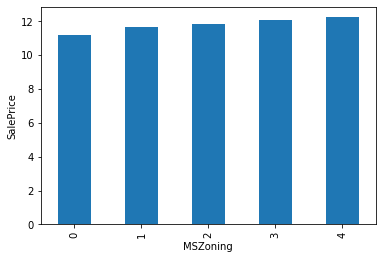

In [ ]:
new_df = pd.concat([x_train, y_train], axis=1)
tmp = new_df.groupby('MSZoning')['SalePrice'].median()
tmp.plot.bar()
plt.ylabel('SalePrice')
plt.show()

In [ ]:
def plot_new_cat_to_num(xtrain, ytrain, col ):
  new_df = pd.concat([xtrain, ytrain], axis=1)
  tmp = new_df.groupby(col)['SalePrice'].median()
  tmp.plot.bar()
  plt.ylabel('SalePrice')
  plt.show()
                     

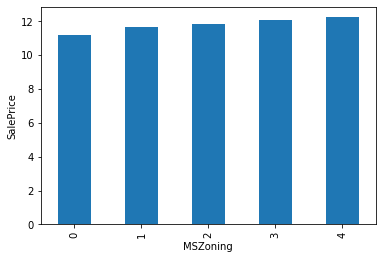

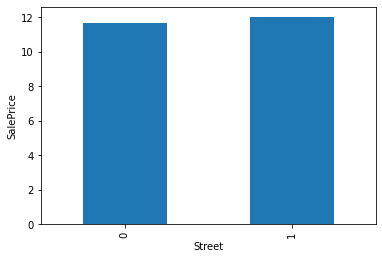

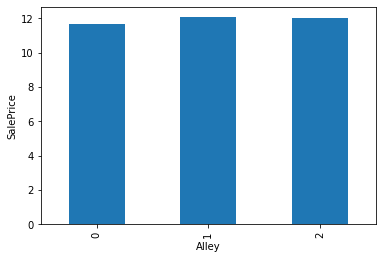

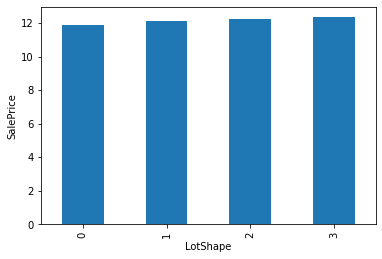

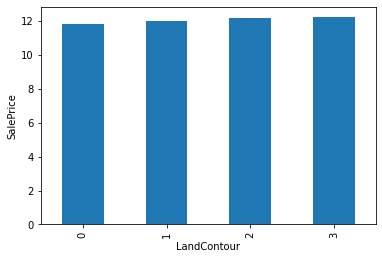

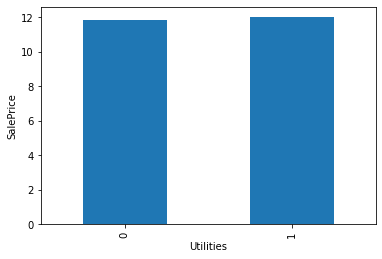

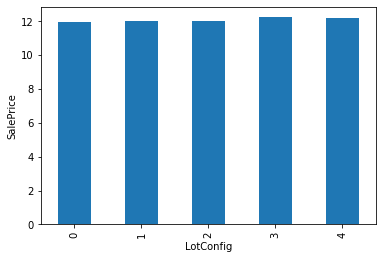

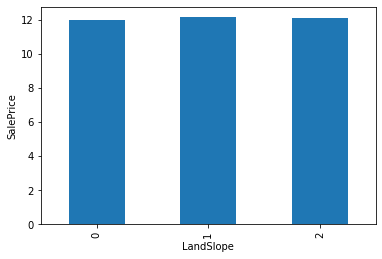

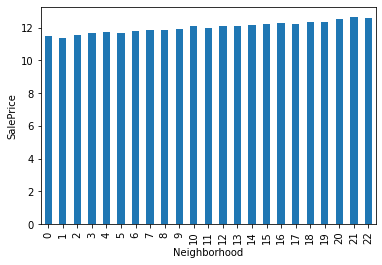

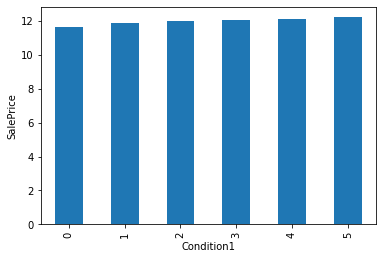

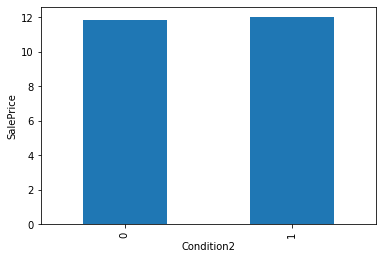

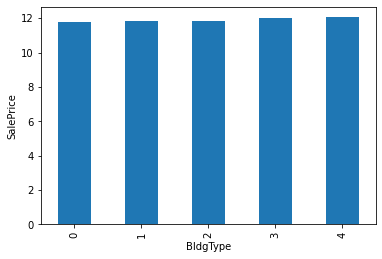

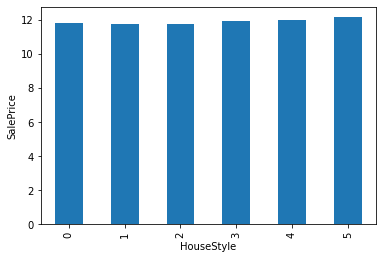

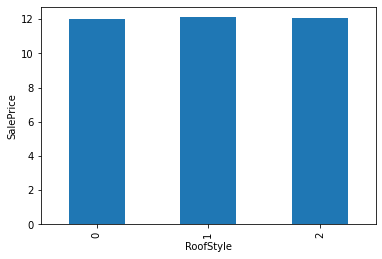

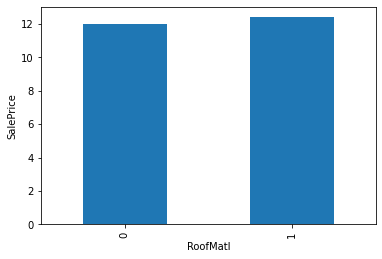

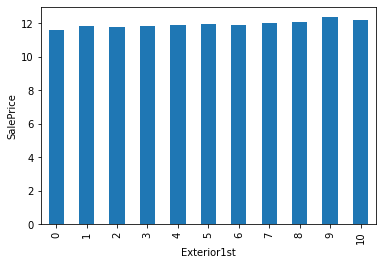

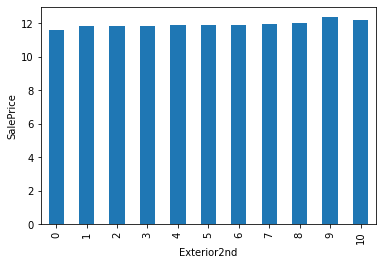

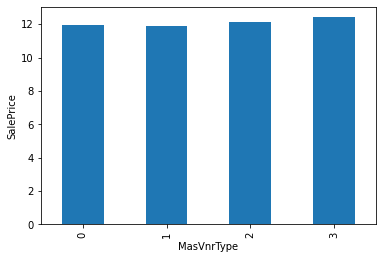

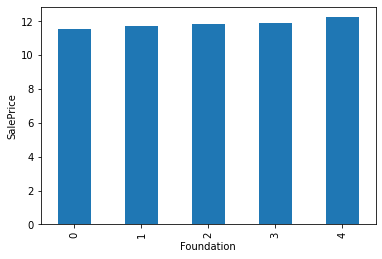

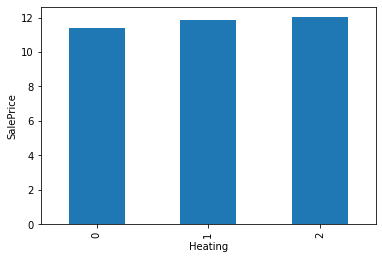

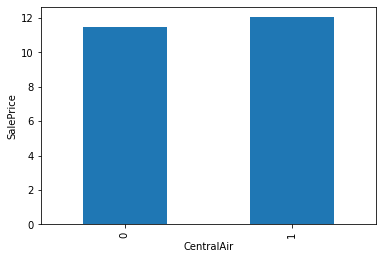

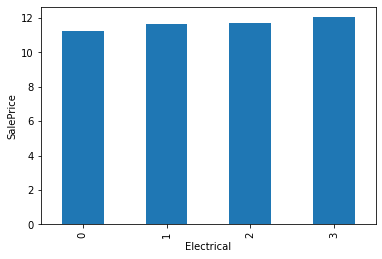

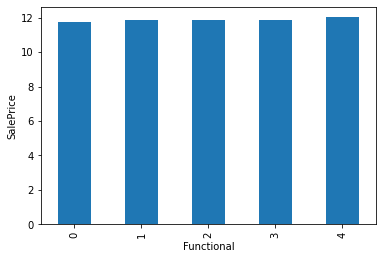

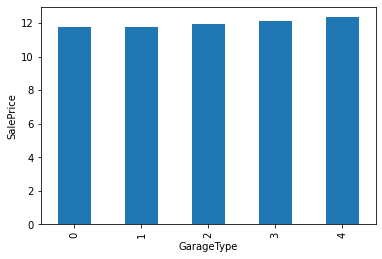

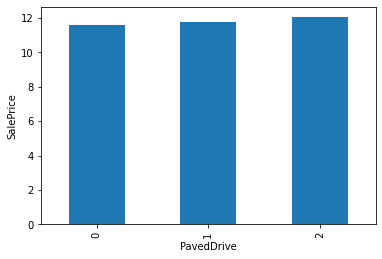

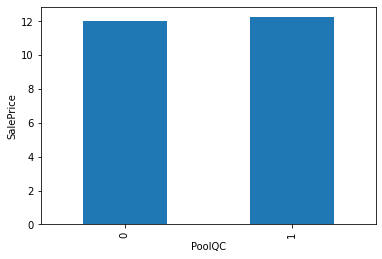

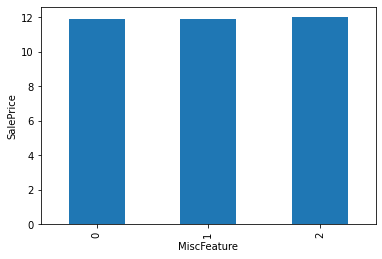

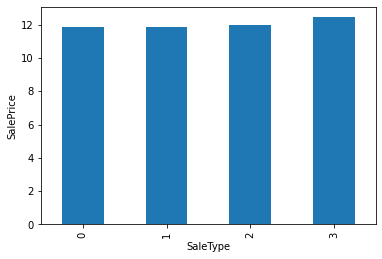

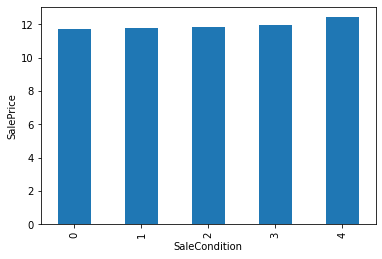

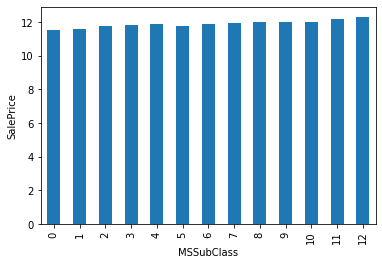

In [ ]:
for col in other_col_categorical:
  plot_new_cat_to_num(x_train, y_train, col)

In [ ]:
# scale the features
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_features_train = scaler.transform(x_train)
scaled_features_test = scaler.transform(x_test)
x_train = pd.DataFrame(scaled_features_train, columns=x_train.columns)
x_test = pd.DataFrame(scaled_features_test, columns=x_test.columns)

In [ ]:
'''
# for jupyter notebook
x_train.to_csv('xtrain.csv', index=False)
x_test.to_csv('xtest.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)
'''

"\n# for jupyter notebook\nx_train.to_csv('xtrain.csv', index=False)\nx_test.to_csv('xtest.csv', index=False)\ny_train.to_csv('ytrain.csv', index=False)\ny_test.to_csv('ytest.csv', index=False)\n"

In [ ]:
'''
x_train.to_csv('xtrain.csv', index=False)
!cp xtrain.csv '/content/drive/MyDrive/Hauspricefile'
'''

"\nx_train.to_csv('xtrain.csv', index=False)\n!cp xtrain.csv '/content/drive/MyDrive/Hauspricefile'\n"

In [ ]:
x_test.shape

(146, 81)

In [ ]:
x_train.to_csv('/content/drive/MyDrive/hauspricefolder/xtrain.csv', index=False)
x_test.to_csv('/content/drive/MyDrive/hauspricefolder/xtest.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/hauspricefolder/ytrain.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/hauspricefolder/ytest.csv', index=False)

In [ ]:
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/hauspricefolder/minmax_scaler.joblib')


['/content/drive/MyDrive/hauspricefolder/minmax_scaler.joblib']